In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t,x,y):
    g = 9.8
    l = 2
    return np.array([y,-g*np.sin(x)/l])

# def f(t,x,y):
#     alpha = -3
#     mu = 1
#     return np.array([y,-(alpha/mu)])

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_euler(N,y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros((N+1,2))
    
    w[0,0] = y[0]
    w[0,1] = y[1]
    
    for i in range(1,len(w)):
        w[i] = w[i-1] + h*f(t[i-1], w[i-1,0], w[i-1,1])
        
    return w,t

def metodo_de_runge_kutta(N, y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros((N+1,2))
    
    w[0,:] = y
    
    for i in range(1, len(w)):
        K1 = h*f(t[i-1], w[i-1,0], w[i-1,1])
        K2 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K1[0], w[i-1,1] + 0.5*K1[1])
        K3 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K2[0], w[i-1,1] + 0.5*K2[1])
        K4 = h*f(t[i], w[i-1,0] + K3[0], w[i-1,1] + K3[1])
        
        w[i] = w[i-1] + (K1 + 2*K2 + 2*K3 + K4)*(1/6)
        
    return w, t

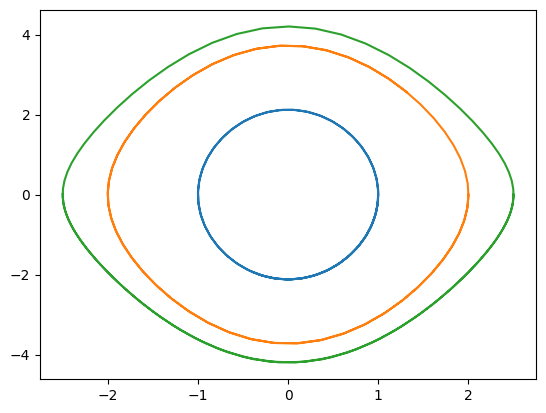

In [19]:
for i in [1,2,2.5]:
    initial_condition = np.array([i,0])
    w, t = metodo_de_runge_kutta(100, initial_condition, 0, 7)

    X = w[:,0]
    Y = w[:,1]

    plt.plot(X,Y)
plt.show()

1.0000
1.5116
3.2660
8.2563
21.6689
57.1054


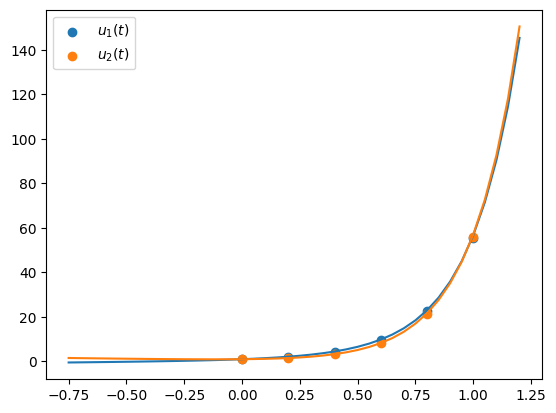

In [47]:
def f(t,x,y):
    return np.array([3*x + 2*y - (2*(t**2) + 1)*np.exp(2*t),
                     4*x + y + (t**2 + 2*t - 4)*np.exp(2*t)])
    
def g(t):
    return (1/3)*np.exp(5*t) - (1/3)*np.exp(-t) + np.exp(2*t)

def h(t):
    return (1/3)*np.exp(5*t) + (2/3)*np.exp(-t) + np.exp(2*t)*t**2

y = np.array([1,1])
w, t = metodo_de_runge_kutta(5, y, 0, 1)

X = w[:,0]
Y = w[:,1]

x = np.arange(-0.75,1.25,0.05)
y = g(x)
z = h(x)

for i in range(len(t)):
    e = abs(h(t) - Y)
    print(f"{h(t)[i]:.4f}")

plt.scatter(t,X, label='$u_1(t)$')
plt.plot(x,y)
plt.scatter(t,Y, label='$u_2(t)$')
plt.legend()
plt.plot(x,z)
plt.savefig("q1a.pdf")
plt.show()

0.0 & -1.00000 & -1.00000 & 0.00000
0.1 & -1.07705 & -1.07705 & 0.00001
0.2 & -1.11554 & -1.11555 & 0.00001
0.3 & -1.12482 & -1.12483 & 0.00001
0.4 & -1.11229 & -1.11230 & 0.00001
0.5 & -1.08382 & -1.08383 & 0.00001
0.6 & -1.04403 & -1.04405 & 0.00001
0.7 & -0.99655 & -0.99656 & 0.00001
0.8 & -0.94418 & -0.94419 & 0.00001
0.9 & -0.88910 & -0.88911 & 0.00001
1.0 & -0.83295 & -0.83297 & 0.00001
1.1 & -0.77699 & -0.77701 & 0.00001
1.2 & -0.72213 & -0.72215 & 0.00001
1.3 & -0.66903 & -0.66905 & 0.00001
1.4 & -0.61816 & -0.61817 & 0.00001
1.5 & -0.56980 & -0.56982 & 0.00001
1.6 & -0.52415 & -0.52417 & 0.00001
1.7 & -0.48129 & -0.48130 & 0.00001
1.8 & -0.44124 & -0.44125 & 0.00001
1.9 & -0.40395 & -0.40396 & 0.00001
2.0 & -0.36936 & -0.36937 & 0.00001


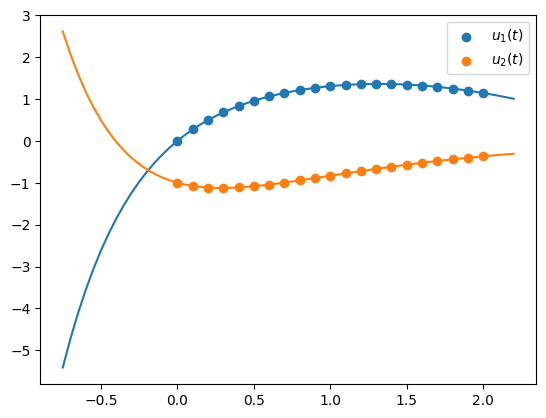

In [45]:
def f(t,x,y):
    return np.array([-4*x - 2*y + np.cos(t) + 4*np.sin(t),
                     3*x + y - 3*np.sin(t)])
    
def g(t):
    return 2*np.exp(-t) - 2*np.exp(-2*t) + np.sin(t)

def h(t):
    return -3*np.exp(-t) + 2*np.exp(-2*t)

y = np.array([0,-1])
w, t = metodo_de_runge_kutta(20, y, 0, 2)

X = w[:,0]
Y = w[:,1]

x = np.arange(-0.75,2.25,0.05)
y = g(x)
z = h(x)

for i in range(len(t)):
    e = abs(h(t) - Y)
    print(f"{t[i]:.1f} & {Y[i]:.5f} & {h(t)[i]:.5f} & {e[i]:.5f}")

plt.scatter(t,X, label='$u_1(t)$')
plt.plot(x,y)
plt.scatter(t,Y, label='$u_2(t)$')
plt.legend()
plt.plot(x,z)
plt.savefig("q1b.pdf")
plt.show()

0.0 & -1.00000 & -1.00000 & 0.00000 \\
0.1 & -0.80481 & -0.80481 & 0.00000 \\
0.2 & -0.61833 & -0.61833 & 0.00000 \\
0.3 & -0.43879 & -0.43879 & 0.00000 \\
0.4 & -0.26392 & -0.26392 & 0.00000 \\
0.5 & -0.09091 & -0.09091 & 0.00000 \\
0.6 & 0.08359 & 0.08359 & 0.00000 \\
0.7 & 0.26344 & 0.26344 & 0.00000 \\
0.8 & 0.45307 & 0.45307 & 0.00000 \\
0.9 & 0.65746 & 0.65746 & 0.00000 \\
1.0 & 0.88212 & 0.88212 & 0.00000 \\


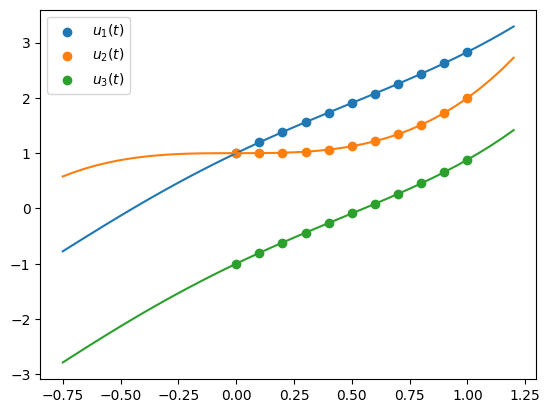

In [51]:
def f(t,x,y,z):
    
    return np.array([y - z + t,
                     3*(t**2),
                    y + np.exp(-t)])
    
def g(t):
    return -0.05*(t**5) + 0.25*(t**4) + t + 2 - np.exp(-t)

def h(t):
    return t**3 + 1

def k(t):
    return 0.25*(t**4) + t - np.exp(-t)

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_runge_kutta_3(N, y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros((N+1,3))
    
    w[0,0] = y[0]
    w[0,1] = y[1]
    w[0,2] = y[2]
    
    for i in range(1, len(w)):
        K1 = h*f(t[i-1], w[i-1,0], w[i-1,1], w[i-1,2])
        K2 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K1[0], w[i-1,1] + 0.5*K1[1], w[i-1,2] + 0.5*K1[2])
        K3 = h*f(t[i-1] + 0.5*h, w[i-1,0] + 0.5*K2[0], w[i-1,1] + 0.5*K2[1], w[i-1,2] + 0.5*K2[2])
        K4 = h*f(t[i], w[i-1,0] + K3[0], w[i-1,1] + K3[1], w[i-1,2] + K3[2])
        
        w[i] = w[i-1] + (K1 + 2*K2 + 2*K3 + K4)*(1/6)
        
    return w, t

y = np.array([1,1,-1])
w,t = metodo_de_runge_kutta_3(10, y, 0, 1)

X = w[:,0]
Y = w[:,1]
Z = w[:,2]

x = np.arange(-0.75,1.25,0.05)

for i in range(len(t)):
    e = abs(k(t) - Z)
    print(f"{t[i]:.1f} & {Z[i]:.5f} & {k(t)[i]:.5f} & {e[i]:.5f} \\\\")


plt.scatter(t, w[:,0], label='$u_1(t)$')
plt.plot(x,g(x))
plt.scatter(t, w[:,1], label='$u_2(t)$')
plt.plot(x,h(x))
plt.scatter(t, w[:,2], label='$u_3(t)$')
plt.plot(x,k(x))
plt.legend()
plt.savefig("q1d.pdf")
plt.show()

0.0 & 0.00000 & 0.00000 & 0.00000\\
0.1 & 0.00001 & 0.00001 & 0.00000\\
0.2 & 0.00015 & 0.00015 & 0.00000\\
0.3 & 0.00083 & 0.00083 & 0.00000\\
0.4 & 0.00283 & 0.00283 & 0.00000\\
0.5 & 0.00743 & 0.00743 & 0.00000\\
0.6 & 0.01656 & 0.01656 & 0.00000\\
0.7 & 0.03300 & 0.03300 & 0.00000\\
0.8 & 0.06056 & 0.06056 & 0.00000\\
0.9 & 0.10440 & 0.10441 & 0.00000\\
1.0 & 0.17132 & 0.17133 & 0.00001\\


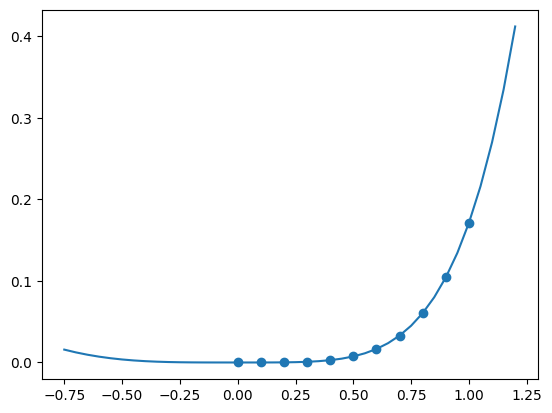

In [63]:
def f(t,x,y):
    return np.array([2*x - y + t*np.exp(t) - t,
                     x])
    
def g(t):
    return (1/6)*(t**3)*np.exp(t) - t*np.exp(t) + 2*np.exp(t) - t -2

y = np.array([0,0])
w, t = metodo_de_runge_kutta(10, y, 0, 1)

X = w[:,0]
Y = w[:,1]

x = np.arange(-0.75,1.25,0.05)
y = g(x)

for i in range(len(t)):
    e = abs(g(t) - Y)
    print(f"{t[i]:.1f} & {Y[i]:.5f} & {g(t)[i]:.5f} & {e[i]:.5f}\\\\")

plt.scatter(t,Y)
plt.plot(x,y)
plt.savefig("q3a.pdf")
plt.show()

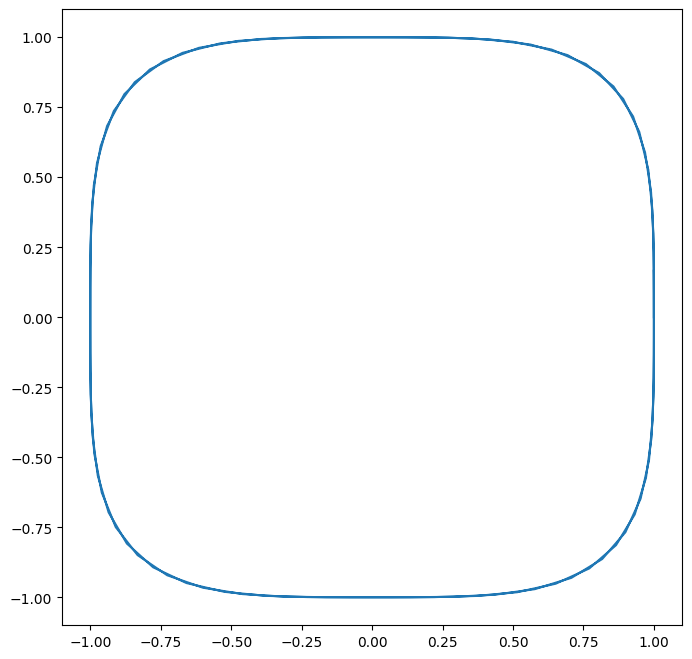

In [38]:
def f(t,x,y):
    return np.array([-y**3,
                      x**3])
    
y = np.array([1,0])
w, t = metodo_de_runge_kutta(100, y, 0, 15)

# csq and sq have an aproximate period of 7.417575

X = w[:,0]
Y = w[:,1]


plt.figure(figsize=(8,8))
# plt.plot(t,X)
# plt.plot(t,Y)
plt.plot(X,Y)
plt.show()

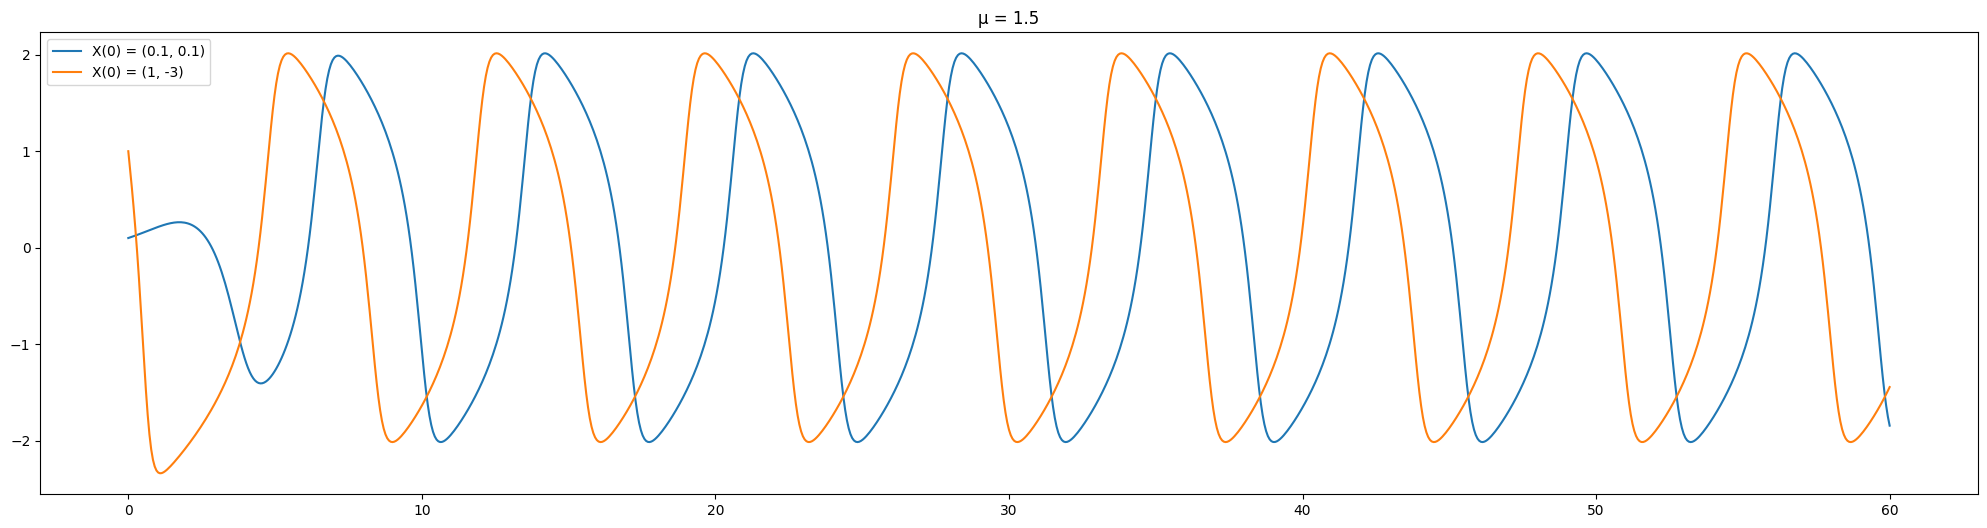

In [41]:
μ = 1.5

def f(t,x,y):
    return np.array([y,
                     μ * (1 - x**2) * y - x])

plt.figure(figsize=(25,6))
for initial_condition in [[0.1, 0.1], [1,-3]]:
    initial = np.array(initial_condition)
    w, t = metodo_de_runge_kutta(1000, initial, 0, 60)
    X = w[:,0]
    Y = w[:,1]

    plt.plot(t,X, label=f"X(0) = ({initial[0]}, {initial[1]})")
    
plt.title(f"μ = {μ}")  
plt.legend()  
plt.show()

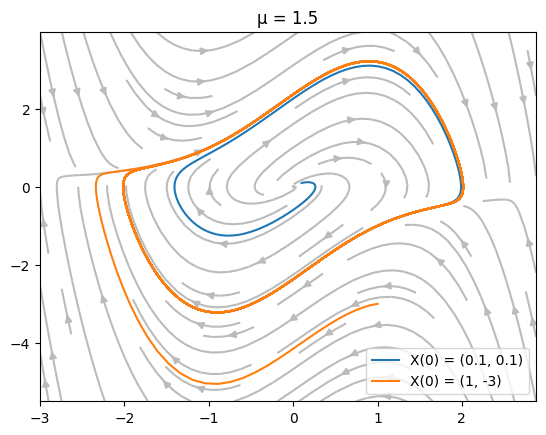

In [45]:
def fn(mu):
    return lambda x, y: (y, -x + mu*(1-x**2)*y)

def direction_field(x_range, y_range, steps, fn=f, ax=plt):
    """ Plot een direction field
    :x_range: tuple -- minimale en maxiamale x-waarde
    :y_range: tuple -- minimale en maxiamale x-waarde
    :steps: integer -- aantal onderverdelingen
    :fn: function -- x, y → x', y'
    :ax: axis -- axis waar geplot moet worden
    """
    delta = abs(x_range[1] - x_range[0]) / steps
    length = delta * 0.4

    xx = np.arange(*x_range, delta)
    yy = np.arange(*y_range, delta)

    X, Y = np.meshgrid(xx, yy)
    U, V = fn(X, Y)

    ax.streamplot(X, Y, U, V, density=0.8, color='#BBBBBB')
    
direction_field(x_range=(-3,3), y_range=(-5.5,4), steps=50, fn=fn(μ))
for initial_condition in [[0.1, 0.1], [1,-3]]:
    initial = np.array(initial_condition)
    w, t = metodo_de_runge_kutta(2000, initial, 0, 60)
    X = w[:,0]
    Y = w[:,1]

    plt.plot(X,Y, label=f"X(0) = ({initial[0]}, {initial[1]})")
    
plt.title(f"μ = {μ}")  
plt.legend()  
plt.show()